# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ > "2.0"

import numpy as np
import os

np.random.seed(100)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.simplefilter("ignore")

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2024-09-16 05:00:08.992759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-16 05:00:09.248564: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-16 05:00:09.248633: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-09-16 05:00:09.333632: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-16 05:00:10.712454: W tensorflow/stream_executor/platform/de

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=100)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1], dtype=int32)

Saving figure perceptron_iris_plot


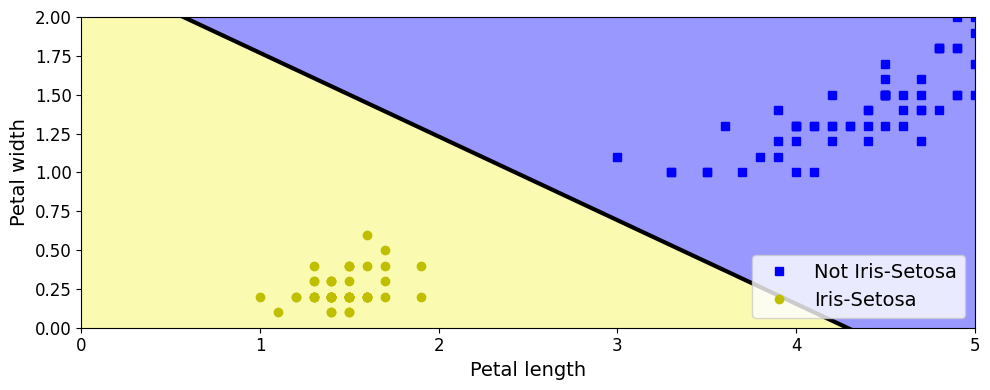

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a*axes[0] + b, a*axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")    

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps = 1e-6):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


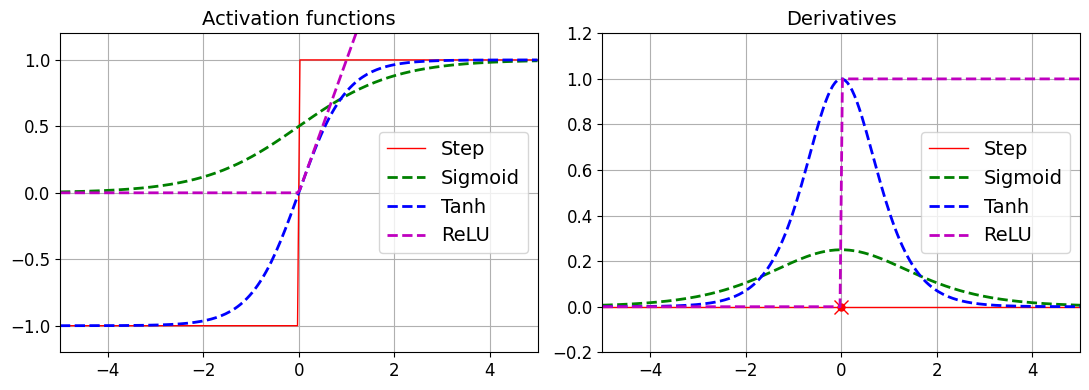

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b--", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m--", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b--", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m--", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) -0.5)

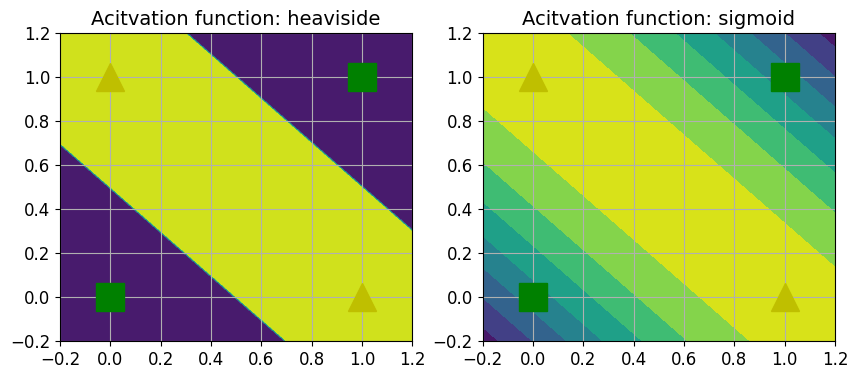

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Acitvation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Acitvation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.10.0'

In [11]:
keras.__version__

'2.10.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [13]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [14]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

(-0.5, 27.5, 27.5, -0.5)

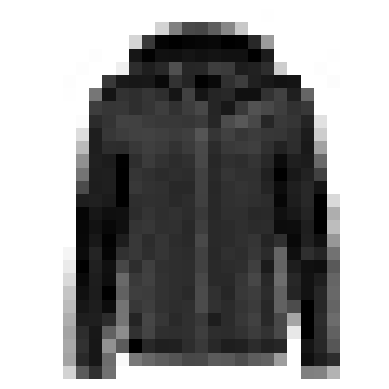

In [16]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')

The labels are the class IDs (represented as uint8), from 0 to 9:

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [19]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


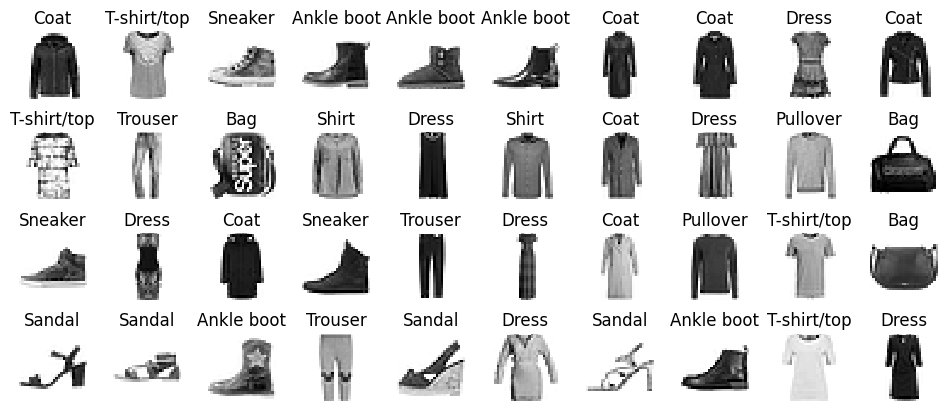

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2024-09-16 05:00:24.731869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-09-16 05:00:24.731941: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-09-16 05:00:24.731983: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter_machrafal): /proc/driver/nvidia/version does not exist
2024-09-16 05:00:24.732558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
keras.backend.clear_session()
np.random.seed(100)
tf.random.set_seed(100)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[-0.00011588,  0.06623408, -0.01534752, ...,  0.0514368 ,
        -0.06927764, -0.04507863],
       [ 0.0322504 ,  0.00961931, -0.01259579, ..., -0.05496464,
        -0.06018544,  0.03255313],
       [ 0.06632304, -0.03645129, -0.03031592, ..., -0.0437807 ,
        -0.04960774, -0.04774487],
       ...,
       [ 0.05658266, -0.05912623, -0.05275124, ..., -0.03531405,
        -0.01362134, -0.06488989],
       [ 0.02234583, -0.01357066, -0.06026094, ...,  0.01145062,
        -0.01328537, -0.02336063],
       [ 0.02776954,  0.02596905, -0.04659374, ..., -0.01160087,
         0.02202777,  0.04848538]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [37]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7183 - accuracy: 0.7638 - val_loss: 0.5707 - val_accuracy: 0.8038
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4873 - accuracy: 0.8306 - val_loss: 0.4401 - val_accuracy: 0.8462
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4414 - accuracy: 0.8468 - val_loss: 0.4051 - val_accuracy: 0.8620
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4134 - accuracy: 0.8562 - val_loss: 0.3970 - val_accuracy: 0.8680
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3932 - accuracy: 0.8620 - val_loss: 0.4063 - val_accuracy: 0.8564
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3780 - accuracy: 0.8673 - val_loss: 0.3793 - val_accuracy: 0.8672
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3644 - accuracy: 0.8716 - val_loss: 0.3568 - val_accurac

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


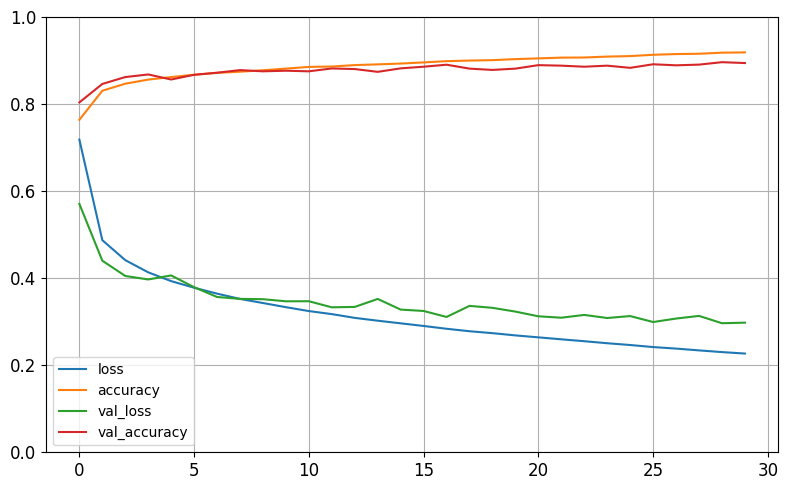

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3240 - accuracy: 0.8845


[0.3239862024784088, 0.8845000267028809]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 171ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [44]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 53ms/step


array([9, 2, 1])

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


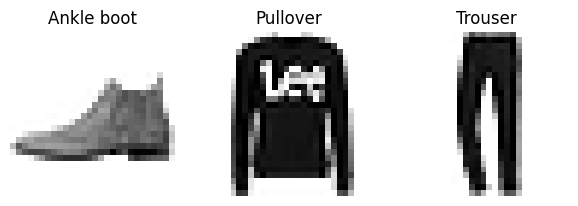

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=100)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=100)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
np.random.seed(100)
tf.random.set_seed(100)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.9886 - val_loss: 0.8891
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8109 - val_loss: 0.7338
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7317 - val_loss: 0.6831
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6886 - val_loss: 0.6440
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6551 - val_loss: 0.6141
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6282 - val_loss: 0.5919
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6055 - val_loss: 0.5732
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5554
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5704 - val_loss: 0.5415
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5566 - val_loss: 0.5314

(0.0, 1.0)

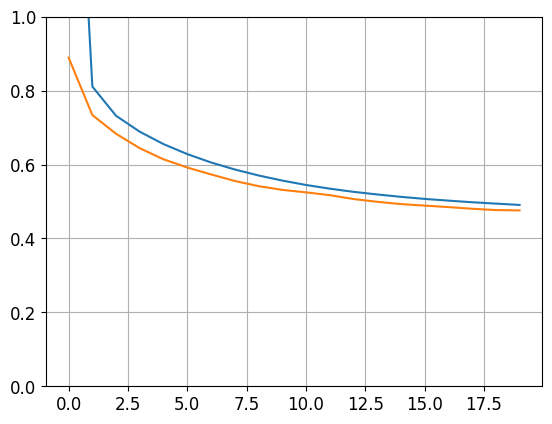

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [52]:
y_pred

array([[2.0074267],
       [1.4404006],
       [2.0884461]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [53]:
np.random.seed(100)
tf.random.set_seed(100)

In [54]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.0881 - val_loss: 0.7857
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7330 - val_loss: 0.6488
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6448 - val_loss: 0.6117
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6127 - val_loss: 0.5806
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5883 - val_loss: 0.5601
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5686 - val_loss: 0.5447
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5523 - val_loss: 0.5314
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5393 - val_loss: 0.5189
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5281 - val_loss: 0.5078
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5189 - val_loss: 0.4995

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [57]:
np.random.seed(100)
tf.random.set_seed(100)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.0308 - val_loss: 1.0854
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9369 - val_loss: 0.7720
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7580 - val_loss: 0.6749
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6803 - val_loss: 0.6198
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6339 - val_loss: 0.5821
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6016 - val_loss: 0.5552
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5776 - val_loss: 0.5368
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5596 - val_loss: 0.5211
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5456 - val_loss: 0.5095
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5347 - val_loss: 0.5026

Adding an auxiliary output for regularization:

In [60]:
np.random.seed(100)
tf.random.set_seed(100)

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [62]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.5787 - main_output_loss: 2.2692 - aux_output_loss: 5.3637 - val_loss: 1.2933 - val_main_output_loss: 0.9278 - val_aux_output_loss: 4.5832
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.1211 - main_output_loss: 0.8088 - aux_output_loss: 3.9320 - val_loss: 0.9681 - val_main_output_loss: 0.7049 - val_aux_output_loss: 3.3367
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9314 - main_output_loss: 0.7039 - aux_output_loss: 2.9793 - val_loss: 0.8421 - val_main_output_loss: 0.6425 - val_aux_output_loss: 2.6381
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8358 - main_output_loss: 0.6579 - aux_output_loss: 2.4376 - val_loss: 0.7693 - val_main_output_loss: 0.6057 - val_aux_output_loss: 2.2418
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7753 - main_output_loss: 0.6265 - aux_output_loss: 2.1151 - val_loss

In [64]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 102ms/step


# The subclassing API

In [65]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation="relu")

In [66]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.8649 - output_1_loss: 2.7778 - output_2_loss: 3.6494 - val_loss: 1.4931 - val_output_1_loss: 1.3276 - val_output_2_loss: 2.9830
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.1881 - output_1_loss: 1.0424 - output_2_loss: 2.4992 - val_loss: 0.9971 - val_output_1_loss: 0.8488 - val_output_2_loss: 2.3317
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.9208 - output_1_loss: 0.7996 - output_2_loss: 2.0118 - val_loss: 0.8522 - val_output_1_loss: 0.7244 - val_output_2_loss: 2.0023
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8258 - output_1_loss: 0.7192 - output_2_loss: 1.7849 - val_loss: 0.7837 - val_output_1_loss: 0.6689 - val_output_2_loss: 1.8168
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7762 - output_1_loss: 0.6775 - output_2_loss: 1.6645 - val_loss: 0.7435 - val_output_1_loss: 0.6374 - val_ou

# Saving and Restoring

In [67]:
np.random.seed(100)
tf.random.set_seed(100)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [69]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 2.6652 - val_loss: 1.4177
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9270 - val_loss: 0.6925
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6786 - val_loss: 0.6127
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6329 - val_loss: 0.5841
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6068 - val_loss: 0.5643
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.5488
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5674 - val_loss: 0.5362
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5526 - val_loss: 0.5243
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5401 - val_loss: 0.5125
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4879


In [70]:
model.save("my_keras_model.h5")

In [71]:
model = keras.models.load_model("my_keras_model.h5")

In [72]:
model.predict(X_new)

1/1 [==============================] - 0s 75ms/step


array([[2.0660973],
       [1.3910415],
       [1.7947924]], dtype=float32)

In [73]:
model.save_weights("my_keras_weigths.ckpt")

# Using Callbacks during Training

In [75]:
keras.backend.clear_session()
np.random.seed(100)
tf.random.set_seed(100)

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [77]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.3535 - val_loss: 1.1100
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8564 - val_loss: 0.7071
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7004 - val_loss: 0.6354
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6494 - val_loss: 0.5933
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6118 - val_loss: 0.5607
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5816 - val_loss: 0.5357
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5564 - val_loss: 0.5146
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5360 - val_loss: 0.4954
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5187 - val_loss: 0.4810
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4633


In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4931 - val_loss: 0.4596
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4842 - val_loss: 0.4510
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4768 - val_loss: 0.4450
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4704 - val_loss: 0.4399
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4655 - val_loss: 0.4351
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4611 - val_loss: 0.4317
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4573 - val_loss: 0.4292
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4540 - val_loss: 0.4253
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4508 - val_loss: 0.4227
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4479 - val_lo

In [79]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [80]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

359/363 [============================>.] - ETA: 0s - loss: 0.3663
val/train: 0.97
363/363 [==============================] - 1s 3ms/step - loss: 0.3666 - val_loss: 0.3569


# TensorBoard

In [81]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [82]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2024_09_16-05_09_17'

In [83]:
keras.backend.clear_session()
np.random.seed(100)
tf.random.set_seed(100)

In [84]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [85]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 2.5337 - val_loss: 1.2472
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9374 - val_loss: 0.7538
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7202 - val_loss: 0.6494
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6516 - val_loss: 0.6063
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6158 - val_loss: 0.5761
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5906 - val_loss: 0.5546
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5707 - val_loss: 0.5374
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5541 - val_loss: 0.5229
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5399 - val_loss: 0.5108
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5279 - val_loss: 0.5009

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [86]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [87]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2024_09_16-05_09_55'

In [88]:
keras.backend.clear_session()
np.random.seed(100)
tf.random.set_seed(100)

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [90]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.6884 - val_loss: 0.3903
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] 

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [91]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [92]:
keras.backend.clear_session()
np.random.seed(100)
tf.random.set_seed(100)

In [93]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [94]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [95]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.1180 - val_loss: 0.5756
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6121 - val_loss: 0.5272
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5364 - val_loss: 0.4913
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5067 - val_loss: 0.4682
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4890 - val_loss: 0.4533
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4775 - val_loss: 0.4440
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4680 - val_loss: 0.4416
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4614 - val_loss: 0.4285
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4548 - val_loss: 0.4240
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4496 - val_lo

In [96]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3458


In [97]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 87ms/step


In [98]:
np.random.seed(100)
tf.random.set_seed(100)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [99]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/50
242/242 [==============================] - 1s 4ms/step - loss: 2.7058 - val_loss: 1.2368
Epoch 2/50
242/242 [==============================] - 1s 3ms/step - loss: 0.9244 - val_loss: 0.7335
Epoch 3/50
242/242 [==============================] - 1s 3ms/step - loss: 0.6999 - val_loss: 0.6497
Epoch 4/50
242/242 [==============================] - 1s 3ms/step - loss: 0.6513 - val_loss: 0.6158
Epoch 5/50
242/242 [==============================] - 1s 3ms/step - loss: 0.6272 - val_loss: 0.5943
Epoch 6/50
242/242 [==============================] - 1s 3ms/step - loss: 0.6090 - val_loss: 0.5759
Epoch 7/50
242/242 [==============================] - 1s 3ms/step - loss: 0.5949 - val_loss: 0.5631
Epoch 8/50
242/242 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5530
Epoch 9/50
242/242 [==============================] - 1s 4ms/step - loss: 0.5739 - val_loss: 0.5455
Epoch 10/50
242/242 [==================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc5183a9ed0>,
                   param_distributions={'learning_rate': [0.0036637947694133383,
                                                          0.0010810854563657625,
                                                          0.002119124322692762,
                                                          0.014678224280748312,
                                                          0.00030659069301040127,
                                                          0.000525121132853971,
                                                          0.006585965087590972,
                                                          0.013453236129081815,
                                                          0.0005630337571192599,
                                                          0.004239434342316...
                                                          0.0021904312263322538,
                                                          0.022760452602591887,
                                                          0.012954480817976233,
                                                          0.001410409274007964,
                                                          0.0006728870376126008,
                                                          0.001670264871648013,
                                                          0.0003079628069786369,
                                                          0.0009593431117900039,
                                                          0.011707017610926032,
                                                          0.00032183346213990587, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [100]:
rnd_search_cv.best_params_

{'n_neurons': 63, 'n_hidden': 2, 'learning_rate': 0.0054637287155864045}

In [101]:
rnd_search_cv.best_score_

-0.34777698914210003

In [102]:
rnd_search_cv.best_estimator_

In [103]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3125


-0.31247183680534363

In [104]:
model = rnd_search_cv.best_estimator_.model
model

In [105]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3125


0.31247183680534363

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [106]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [107]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [108]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [109]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

(-0.5, 27.5, 27.5, -0.5)

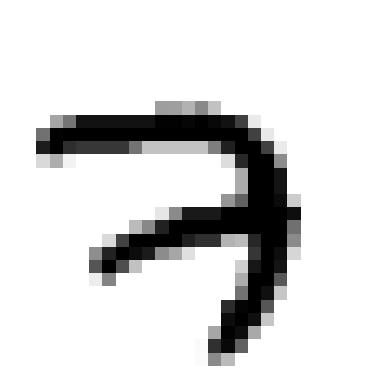

In [110]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [111]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [112]:
X_valid.shape

(5000, 28, 28)

In [113]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

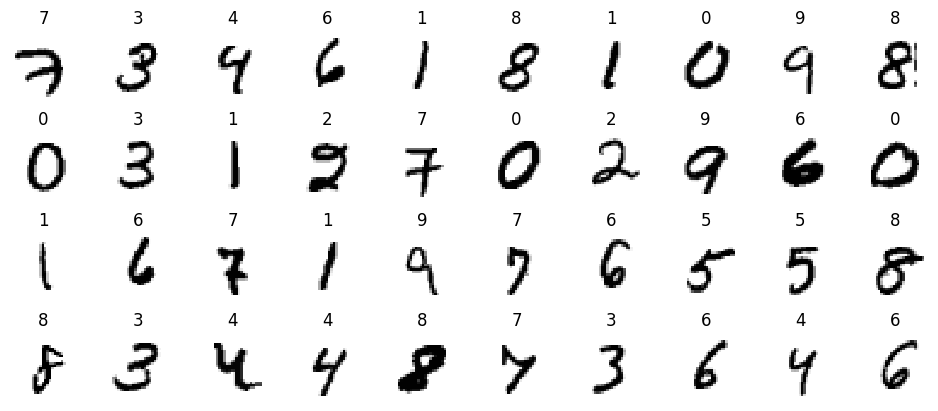

In [114]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [115]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [116]:
keras.backend.clear_session()
np.random.seed(100)
tf.random.set_seed(100)

In [117]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [118]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [119]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 11s 6ms/step - loss: nan - accuracy: 0.6068 - val_loss: nan - val_accuracy: 0.0958


We can now plot the loss as a function of the learning rate:

Text(0, 0.5, 'Loss')

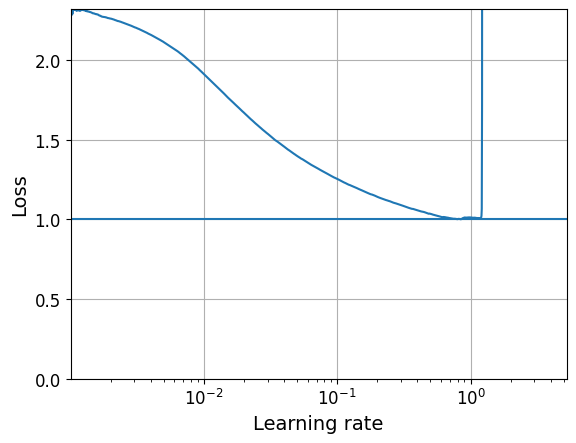

In [120]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [121]:
keras.backend.clear_session()
np.random.seed(100)
tf.random.set_seed(100)

In [122]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [123]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [124]:
run_index = 1 # increment at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [125]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2330 - accuracy: 0.9285 - val_loss: 0.1068 - val_accuracy: 0.9684
Epoch 2/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0960 - accuracy: 0.9697 - val_loss: 0.0961 - val_accuracy: 0.9700
Epoch 3/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0646 - accuracy: 0.9794 - val_loss: 0.0750 - val_accuracy: 0.9784
Epoch 4/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0471 - accuracy: 0.9846 - val_loss: 0.0693 - val_accuracy: 0.9814
Epoch 5/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0680 - val_accuracy: 0.9800
Epoch 6/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0618 - val_accuracy: 0.9830
Epoch 7/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0824 - val_accuracy:

In [126]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9786


[0.07142048329114914, 0.978600025177002]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [127]:
%tensorboard --logdir=./my_mnist_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
2024-09-16 05:35:46.592476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-16 05:35:46.793596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-16 05:35:46.793662: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-09-16 05:35:46.847063: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been regi